Zad 4. Dokonaj grupowania danych z arkusza "2-dane" i zaprezentuj rezultaty. Do tego zadania wybierz swoje ulubione / najlepiej pasujące narzędzie. 

Wczytanie zbioru danych

In [161]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator

df=pd.read_excel("Staż letni OtoMoto.xlsx",sheet_name=2)
df.head()

,id_ad,region,brand,model,mileage,year,price,fuel_type,body_type
0,1000000001,malopolskie,fiat,126,94,1988,70040,petrol,hatchback
1,1000000002,zachodniopomorskie,skoda,superb,750000,2008,30797,diesel,sedan
2,1000000003,lodzkie,mercedes-benz,w201-190,425000,1985,11329,diesel,sedan
3,1000000004,slaskie,bmw,other,81000,1966,132870,petrol,coupe
4,1000000005,mazowieckie,alfa-romeo,giulia,1,2017,390370,petrol,sedan


In [162]:
df.columns


Index(['id_ad', 'region', 'brand', 'model', 'mileage', 'year', 'price',
       'fuel_type', 'body_type'],
      dtype='object')

Dokonane zostanie grupowanie według czasu produkcji oraz ceny auta. Pozwoli to na stworzenie kategorii.

In [163]:
# Wybór cech do klastrowania
features = ['price', 'year']


# Standaryzacja danych
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

Określenie ilości klastrów za pomocą metody "łokcia"

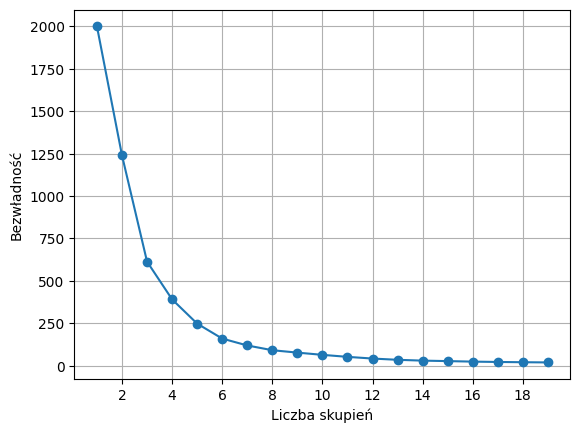

In [164]:


# Wyznaczenie liczby klastrów za pomocą obliczenia bezwładności w metodzie "łokcia"
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 20), inertia, marker='o')
plt.gca().get_xaxis().set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Liczba skupień')
plt.ylabel('Bezwładność')
plt.grid(True)
plt.show()



Wykres zaczyna się mocno wypłaszcać w oklicach 12 skupień, więc tyle klastrów stworzymy

In [165]:
# Wybór optymalnej liczby klastrów

optimal_k = 12  # na podstawie analizy wykresu dotyczącego metody "łokcia"

# Klastrowanie danych za pomocą K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


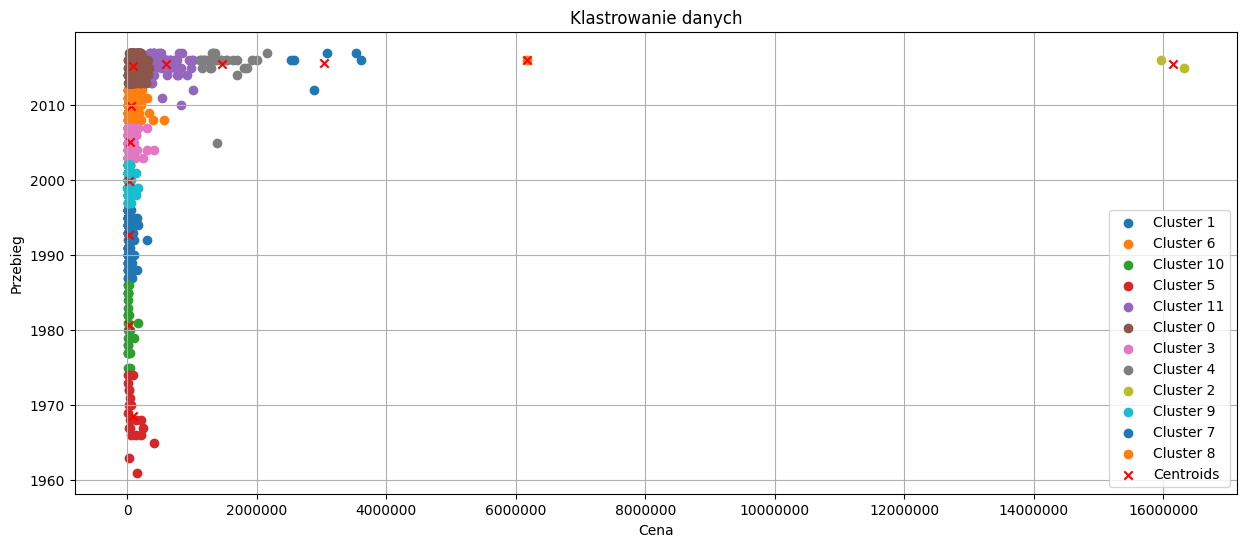

In [166]:

#wykres
scaled_centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(15, 6))
for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['price'], cluster_data['year'], label=f'Cluster {cluster_label}', cmap='magma')

plt.scatter(scaled_centers[:, 0], scaled_centers[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Cena')
plt.ylabel('Przebieg')
plt.title('Klastrowanie danych')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(True)
plt.legend()
plt.show()

Otrzymywana jest w ten sposób przynależność do klastra w kolumnie cluster.

In [167]:
df.head()

,id_ad,region,brand,model,mileage,year,price,fuel_type,body_type,cluster
0,1000000001,malopolskie,fiat,126,94,1988,70040,petrol,hatchback,1
1,1000000002,zachodniopomorskie,skoda,superb,750000,2008,30797,diesel,sedan,6
2,1000000003,lodzkie,mercedes-benz,w201-190,425000,1985,11329,diesel,sedan,10
3,1000000004,slaskie,bmw,other,81000,1966,132870,petrol,coupe,5
4,1000000005,mazowieckie,alfa-romeo,giulia,1,2017,390370,petrol,sedan,11


Za jej pomocą jesteśmy w stanie odflitrować na przykład auta luksusowe, które należałyby do klastrów nr 2,7,8.

In [168]:
selected_rows = df[df['cluster'].isin([2,7,8])]

# Display the selected rows
print(selected_rows)

          id_ad       region        brand          model  mileage  year  \
14   1000000015    pomorskie      ferrari      laferrari       10  2016   
26   1000000027      slaskie  lamborghini      aventador     1030  2016   
34   1000000035  mazowieckie  lamborghini      aventador       10  2016   
44   1000000045  malopolskie        lexus            lfa     5663  2012   
85   1000000086  mazowieckie      ferrari      laferrari       80  2015   
105  1000000106  mazowieckie  lamborghini      aventador       70  2016   
184  1000000185  mazowieckie  lamborghini      aventador       50  2017   
325  1000000326  mazowieckie      ferrari  f12berlinetta     5500  2016   
652  1000000653  mazowieckie  lamborghini      aventador       20  2017   

        price fuel_type body_type  cluster  
14   15965000    hybrid     coupe        2  
26    3605000    petrol  roadster        7  
34    2575000    petrol     coupe        7  
44    2884000    petrol     coupe        7  
85   16325500    hybrid 